In [17]:

#Khởi tạo models 
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense,Activation,Dropout,Conv2D,MaxPooling2D,Flatten
from keras.models import  Sequential
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import pandas as pd
from tensorflow.keras.models import load_model
from keras.preprocessing.image import img_to_array
from tensorflow import keras
from tensorflow.keras import layers



In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:

train_dataset = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
horizontal_flip=True)
validation_dataset = ImageDataGenerator(rescale=1./255)
test_dataset = ImageDataGenerator(rescale=1./255)

training_generator = train_dataset.flow_from_directory(
                      '/content/drive/MyDrive/Colab Notebooks/covid/train',
                        target_size=(224, 224),
                        batch_size=30,
                        class_mode="categorical")

test_dataset = test_dataset.flow_from_directory(
                        "/content/drive/MyDrive/Colab Notebooks/covid/test",
                         target_size=(224, 224),
                          batch_size=30,
                          
                         class_mode="categorical")
#training_generator=np.array(training_generator)  # tạo mảng


Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.


In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same', input_shape=(224,224,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(64,activation='relu',name='fc1'))
model.add(Dense(32,activation='relu',name='fc2'))
model.add(Dense(3,activation='softmax'))
model.summary()
#from tensorflow.keras.optimizers import Adam
#opt = Adam(learning_rate=0.001)
from tensorflow.keras.optimizers import SGD
opt = SGD(lr=0.001, momentum=0.9)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                    

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
from tensorflow.keras.optimizers import SGD
opt = SGD(lr=0.001, momentum=0.9)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
history = model.fit(training_generator,batch_size=30,epochs=25,verbose=1,validation_data=test_dataset)

Epoch 1/25
172/172 [==============================] - 2791s 16s/step - loss: 0.6624 - accuracy: 0.7249 - val_loss: 0.2902 - val_accuracy: 0.8998
Epoch 2/25
172/172 [==============================] - 201s 1s/step - loss: 0.4086 - accuracy: 0.8449 - val_loss: 0.2551 - val_accuracy: 0.9022
Epoch 3/25
172/172 [==============================] - 197s 1s/step - loss: 0.3257 - accuracy: 0.8756 - val_loss: 0.2311 - val_accuracy: 0.9161
Epoch 4/25
172/172 [==============================] - 196s 1s/step - loss: 0.2911 - accuracy: 0.8888 - val_loss: 0.2243 - val_accuracy: 0.9278
Epoch 5/25
172/172 [==============================] - 194s 1s/step - loss: 0.2716 - accuracy: 0.9018 - val_loss: 0.2274 - val_accuracy: 0.9332
Epoch 6/25
172/172 [==============================] - 196s 1s/step - loss: 0.2633 - accuracy: 0.9010 - val_loss: 0.1998 - val_accuracy: 0.9301
Epoch 7/25
172/172 [==============================] - 199s 1s/step - loss: 0.2514 - accuracy: 0.9032 - val_loss: 0.1955 - val_accuracy: 0.93

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/covid/1.h5') 

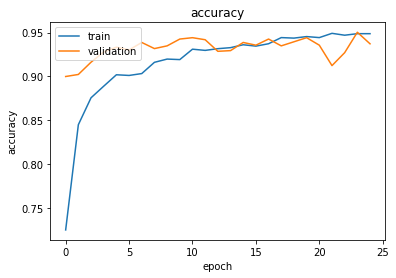

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

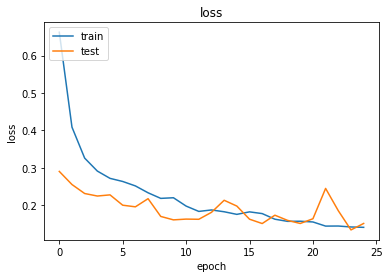

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
training_generator.class_indices

{'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2}

In [26]:
names= ['COVID','Normal','PNEUMONIA']

Predict: Normal
[[0.01992741 0.9576314  0.0224412 ]]


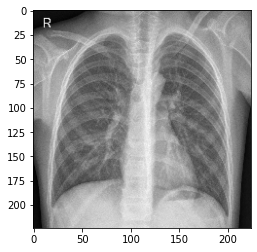

In [28]:
from keras.preprocessing.image import load_img
img=load_img('bt10.jpeg',target_size=(224,224,3))
plt.imshow(img)
img=img_to_array(img)  # tạo mảng
img=img.reshape(1,224,224,3)
img=img.astype('float32')
img=img/255
import numpy as np
#np.argmax(model.predict(img),axis=1)   #vi tri so 46
print('Predict:',names[np.argmax(model.predict(img))])
data[0]=img
prediction=model.predict(data)
print(prediction)

In [2]:
import tensorflow.keras
from PIL import Image,ImageOps
import numpy as np


In [4]:

from google.colab import drive
drive.mount('/content/drive/')
np.set_printoptions(suppress=True)
model=tensorflow.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/covid/1.h5')

Mounted at /content/drive/


In [5]:
data=np.ndarray(shape=(1,224,224,3),dtype=np.float32)

In [23]:
from keras.preprocessing.image import load_img
img=load_img('COVID-1023.png',target_size=(224,224,3))
size=(224,224)
image=ImageOps.fit(img,size,Image.ANTIALIAS)
image_array=np.asanyarray(image)
normalized_image_array=(image_array.astype(np.float32)/127.0)-1
#load ảnh từ mảng trên
data[0]= normalized_image_array
#chạy thuật toán và ddauw ra kq
prediction=model.predict(data)
print(prediction)
print('Predict:',names[np.argmax(model.predict(img))])

[[0.9999509  0.00000222 0.00004683]]


ValueError: ignored

In [13]:
m=prediction[0,0]
a=0
mang=[0,1,2]
for i in mang:
  if m<prediction[0,i]:
    m=prediction[0,i]
    a=i
print('vi tri của class giong nha la :',a)
print('gia tri là',m)

vi tri của class giong nha la : 0
gia tri là 0.9999509
